In [48]:
%pip install -R requirements.txt


Usage:   
  /Users/carlos/Development/IEDIB_CEIA_2024-25/Programacion de Inteligencia Artificial/Bloque 7/Actividades/7.1/.venv/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/carlos/Development/IEDIB_CEIA_2024-25/Programacion de Inteligencia Artificial/Bloque 7/Actividades/7.1/.venv/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/carlos/Development/IEDIB_CEIA_2024-25/Programacion de Inteligencia Artificial/Bloque 7/Actividades/7.1/.venv/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/carlos/Development/IEDIB_CEIA_2024-25/Programacion de Inteligencia Artificial/Bloque 7/Actividades/7.1/.venv/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/carlos/Development/IEDIB_CEIA_2024-25/Programacion de Inteligencia Artificial/Bloque 7/Actividades/7.1/.venv/bin/python -m pip install [options] <archive url/path> ...

no such option: -R
Note: you may ne

# Base code:

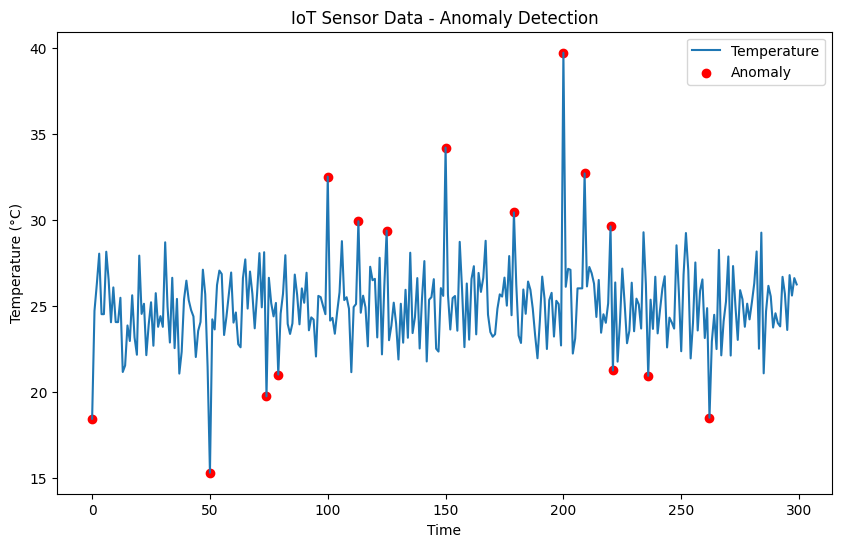

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300):
	np.random.seed(42)
	temperature = np.random.normal(25, 2, samples)  # Normal temperatures around 25°C
	# Introduce anomalies (very high or low temperatures)
	temperature[::50] = np.random.uniform(10, 40, samples // 50)
	return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies(data):
	model = IsolationForest(contamination=0.05, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

# Step 3: Visualize Sensor Data and Anomalies
def plot_anomalies(data):
	plt.figure(figsize=(10, 6))
	plt.plot(data.index, data['temperature'], label='Temperature')

	# Mark anomalies in red
	anomalies = data[data['anomaly'] == -1]
	plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomaly')

	plt.title('IoT Sensor Data - Anomaly Detection')
	plt.xlabel('Time')
	plt.ylabel('Temperature (°C)')
	plt.legend()
	plt.show()

sensor_data = simulate_sensor_data(300)
analyzed_data = detect_anomalies(sensor_data)
plot_anomalies(analyzed_data) 

# 1) Fijad la temperatura media en 20 grados.
# 2) Duplicad la amplitud de las temperaturas anómalas.
# 3) Cambiad la medida de la muestra a 500 valores.
# 4) Experimentad con los diferentes valores del parámetro "contamination". ¿Cuál es su efecto?

# Modified code:

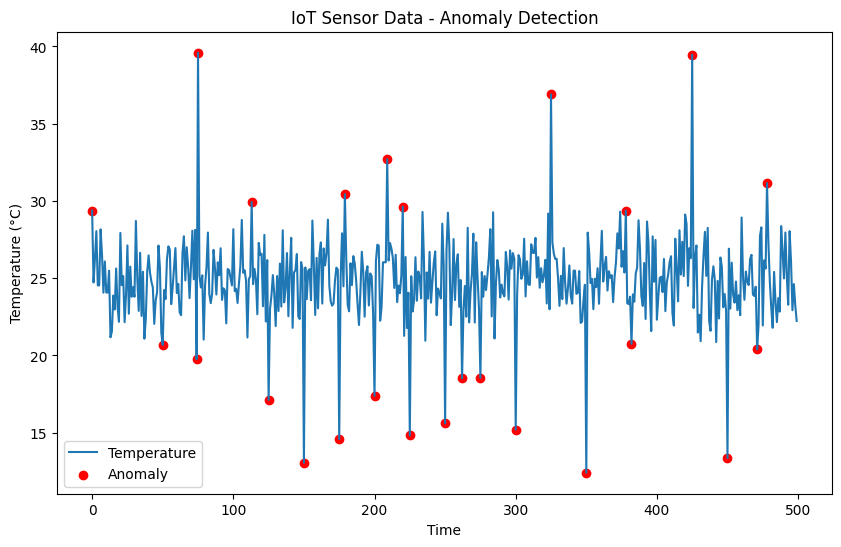

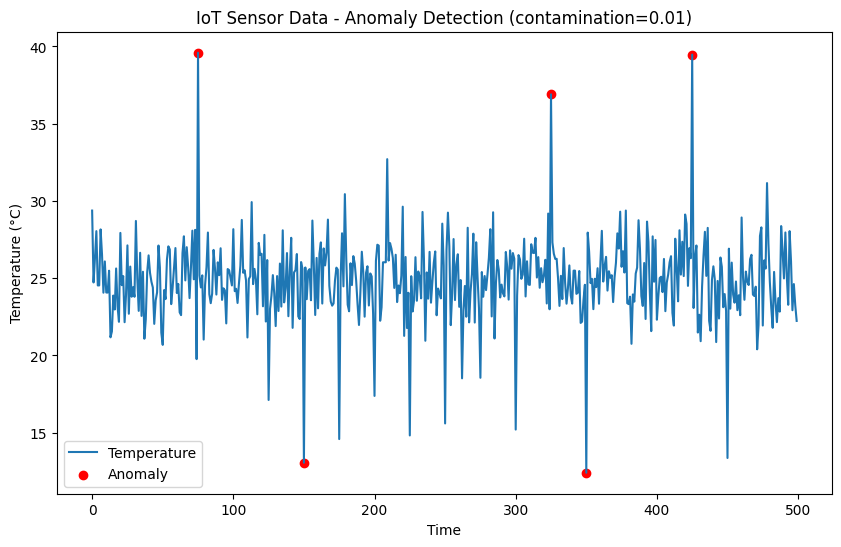

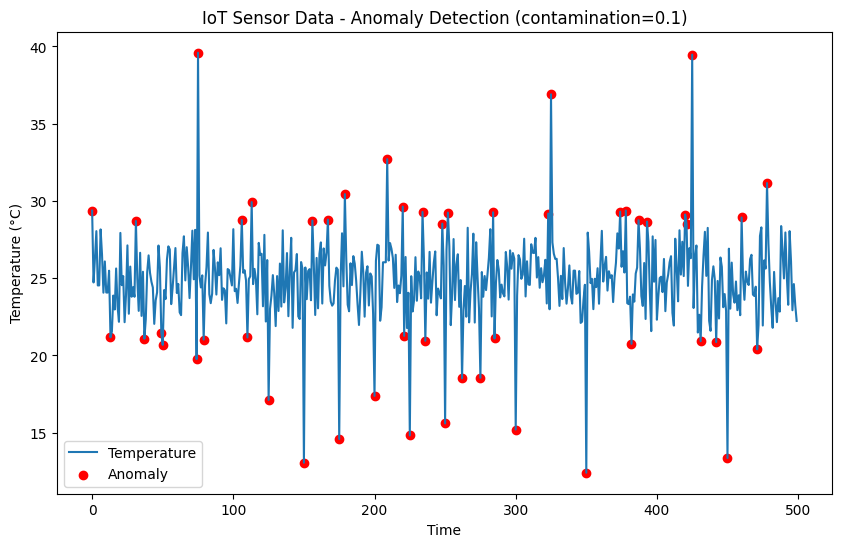

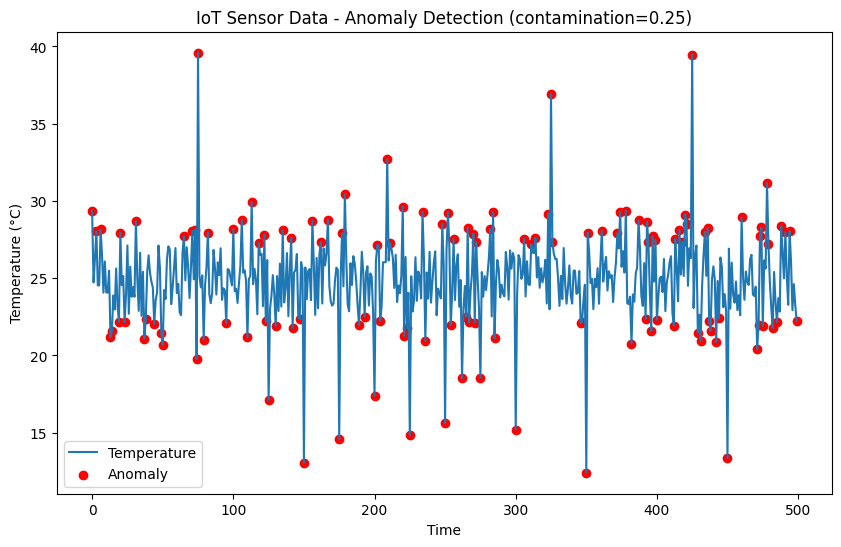

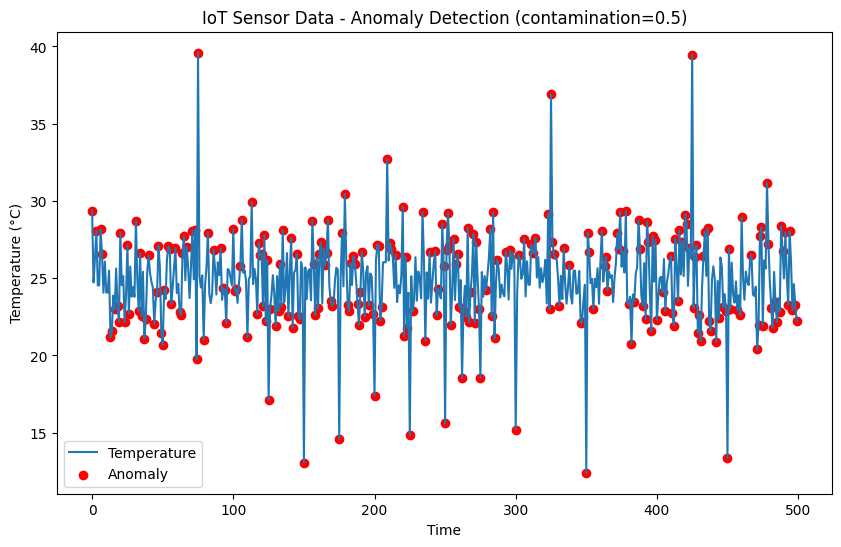

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300):
	np.random.seed(42)
	#* (1) -> from 25 to 20
	temperature = np.random.normal(25, 2, samples)  # Normal temperatures around 25°C
	# Introduce anomalies (very high or low temperatures)
	# temperature[::50] = np.random.uniform(10, 40, samples // 50) # -> OLD
	temperature[::25] = np.random.uniform(10, 40, samples // 25) #* (2) -> duplicated number of anomalies
	return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies_old(data): #* (4) -> Rename method
	model = IsolationForest(contamination=0.05, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

#* (4) -> Create separated method to use different contamination values
def detect_anomalies(data, contamination = 0.05):
	model = IsolationForest(contamination=contamination, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

# Step 3: Visualize Sensor Data and Anomalies
def plot_anomalies(data, title='IoT Sensor Data - Anomaly Detection'):
	plt.figure(figsize=(10, 6))
	plt.plot(data.index, data['temperature'], label='Temperature')

	# Mark anomalies in red
	anomalies = data[data['anomaly'] == -1]
	plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomaly')

	plt.title(title)
	plt.xlabel('Time')
	plt.ylabel('Temperature (°C)')
	plt.legend()
	plt.show()

sensor_data = simulate_sensor_data(500) #* (3) -> from 300 to 500
analyzed_data = detect_anomalies(data=sensor_data)
plot_anomalies(analyzed_data) 

# Plot different contamination values
sensor_data = simulate_sensor_data(500) #* (3) -> from 300 to 500
analyzed_data = detect_anomalies(data=sensor_data, contamination=0.01)
plot_anomalies(data=analyzed_data, title='IoT Sensor Data - Anomaly Detection (contamination=0.01)') 

sensor_data = simulate_sensor_data(500) #* (3) -> from 300 to 500
analyzed_data = detect_anomalies(data=sensor_data, contamination=0.1)
plot_anomalies(data=analyzed_data, title='IoT Sensor Data - Anomaly Detection (contamination=0.1)') 

sensor_data = simulate_sensor_data(500) #* (3) -> from 300 to 500
analyzed_data = detect_anomalies(data=sensor_data, contamination=0.25)
plot_anomalies(data=analyzed_data, title='IoT Sensor Data - Anomaly Detection (contamination=0.25)')  

sensor_data = simulate_sensor_data(500) #* (3) -> from 300 to 500
analyzed_data = detect_anomalies(data=sensor_data, contamination=0.5)
plot_anomalies(data=analyzed_data, title='IoT Sensor Data - Anomaly Detection (contamination=0.5)') 


**(4)** Como era de esperar, a medida que se aumenta el parámetro de contaminación de los datos, aparecen más y más anomalías. Se puede observar una evolución del aumento del número muy clara en los gráficos mostrados anteriormente.

# 5) Añadidr las fronteras de decisión del modelo. Os será útil el ejemplo de: [scikit-learn: plot isolation forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html)

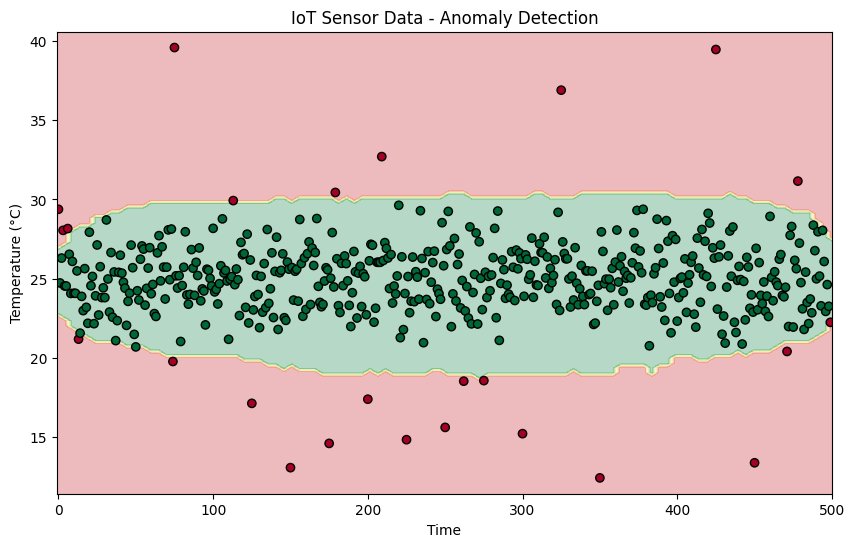

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300):
	np.random.seed(42)
	temperature = np.random.normal(25, 2, samples)  # Normal temperatures around 25°C
	# Introduce anomalies (very high or low temperatures)
	temperature[::25] = np.random.uniform(10, 40, samples // 25) 
	return pd.DataFrame({'time': np.arange(samples), 'temperature': temperature}) # Add time as second column

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies_old(data): 
	model = IsolationForest(contamination=0.05, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

def detect_anomalies(data, contamination = 0.05):
	model = IsolationForest(contamination=contamination, random_state=42)
	data['anomaly'] = model.fit_predict(data[['time', 'temperature']])
	return model, data

# Step 3: Visualize Sensor Data and Anomalies
def plot_isolated_anomalies(data, model, title='IoT Sensor Data - Anomaly Detection'):
	fig, ax = plt.subplots(figsize=(10, 6))
	# Create the decision boundary
	DecisionBoundaryDisplay.from_estimator(
		model, data[['time', 'temperature']], response_method="predict",
		grid_resolution=100, alpha=0.3, ax=ax, cmap='RdYlGn'
	)
	
	ax.scatter(data['time'], data['temperature'], c=data['anomaly'], cmap='RdYlGn', edgecolors='k')
	ax.set_title(title)
	ax.set_xlabel('Time')
	ax.set_ylabel('Temperature (°C)')
	plt.show()

sensor_data = simulate_sensor_data(500)
analyzed_model, analyzed_data = detect_anomalies(data=sensor_data) 
plot_isolated_anomalies(data=analyzed_data, model=analyzed_model) 

# 6) Ejecutar el cuaderno sobre datos reales de temperatura de alguna de las fuentes disponibles en [thingspeak](https://thingspeak.mathworks.com/channels/public).

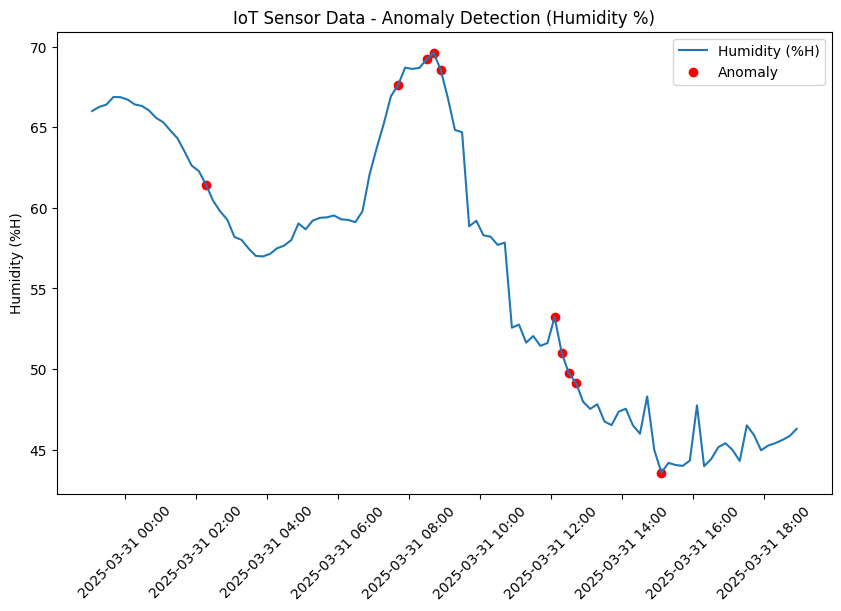

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # for date formatting
from sklearn.ensemble import IsolationForest

# Extra method to load data from CSV
def load_dataframe_from_csv(file):
	df = pd.read_csv(file)
	# Make sure data is numeric and not null:
	df["entry_id"] = pd.to_numeric(df["entry_id"], errors="coerce")
	df["field5"] = pd.to_numeric(df["field5"], errors="coerce")
	df.dropna().reset_index(drop=True)
	df['created_at'] = pd.to_datetime(df['created_at'])
	df = df.set_index('created_at')
	# Rename column for descriptive names
	df.rename(columns={"field5": "humidity"}, inplace=True)

	return df

# Modified code from parts 1, 2, 3 and 4
def detect_anomalies(data, contamination = 0.05):
	model = IsolationForest(contamination=contamination, random_state=42)
	data['anomaly'] = model.fit_predict(data[['humidity']])
	return data

def plot_anomalies(data, title='IoT Sensor Data - Anomaly Detection'):
	plt.figure(figsize=(10, 6))

	data.index = pd.to_datetime(data.index)
	plt.plot(data.index, data['humidity'], label='Humidity (%H)')
	anomalies = data[data['anomaly'] == -1]
	plt.scatter(anomalies.index, anomalies['humidity'], color='red', label='Anomaly')

	# Format X axis for a human-friendly date format
	plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # ticks
	plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
	plt.xticks(rotation=45)

	plt.title(title)
	# plt.xlabel('Time')
	plt.ylabel('Humidity (%H)')
	plt.legend()
	plt.show()

df = load_dataframe_from_csv('./data.csv')
analyzed_data = detect_anomalies(data=df, contamination=0.1) 
plot_anomalies(data=analyzed_data, title='IoT Sensor Data - Anomaly Detection (Humidity %)') 